In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"data/train.csv")

In [3]:
data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [5]:
X= data.drop("rainfall", axis=1)
y = data["rainfall"].copy()

In [4]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# EDA

In [14]:
X_train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
46,46,47,1018.1,20.6,16.1,14.2,12.2,79.0,89.0,1.0,20.0,10.7
1373,1373,74,1011.4,29.1,25.8,23.1,19.3,70.0,32.0,10.6,10.0,9.9
2003,2003,179,1008.9,29.1,27.5,25.3,25.4,81.0,86.0,1.1,220.0,15.7
991,991,262,1008.1,31.0,28.7,27.0,25.0,81.0,78.0,6.4,230.0,23.5
876,876,147,1005.3,33.3,30.3,28.7,24.8,76.0,54.0,10.5,230.0,10.2


In [15]:
X_train.shape

(438, 12)

In [9]:
X_train["day"].nunique()

277

In [10]:
X_train["day"].value_counts()

day
36     5
173    4
124    4
203    4
246    4
      ..
311    1
23     1
102    1
1      1
200    1
Name: count, Length: 277, dtype: int64

In [16]:
train = X_train.reset_index(drop=True)

In [17]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,46,47,1018.1,20.6,16.1,14.2,12.2,79.0,89.0,1.0,20.0,10.7
1,1373,74,1011.4,29.1,25.8,23.1,19.3,70.0,32.0,10.6,10.0,9.9
2,2003,179,1008.9,29.1,27.5,25.3,25.4,81.0,86.0,1.1,220.0,15.7
3,991,262,1008.1,31.0,28.7,27.0,25.0,81.0,78.0,6.4,230.0,23.5
4,876,147,1005.3,33.3,30.3,28.7,24.8,76.0,54.0,10.5,230.0,10.2


In [18]:
train.shape

(438, 12)

In [19]:
train["id"].nunique()

438

In [20]:
train.drop(["id", "day"], axis = 1, inplace=True)

In [21]:
train.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1018.1,20.6,16.1,14.2,12.2,79.0,89.0,1.0,20.0,10.7
1,1011.4,29.1,25.8,23.1,19.3,70.0,32.0,10.6,10.0,9.9
2,1008.9,29.1,27.5,25.3,25.4,81.0,86.0,1.1,220.0,15.7
3,1008.1,31.0,28.7,27.0,25.0,81.0,78.0,6.4,230.0,23.5
4,1005.3,33.3,30.3,28.7,24.8,76.0,54.0,10.5,230.0,10.2


In [22]:
import seaborn as sns

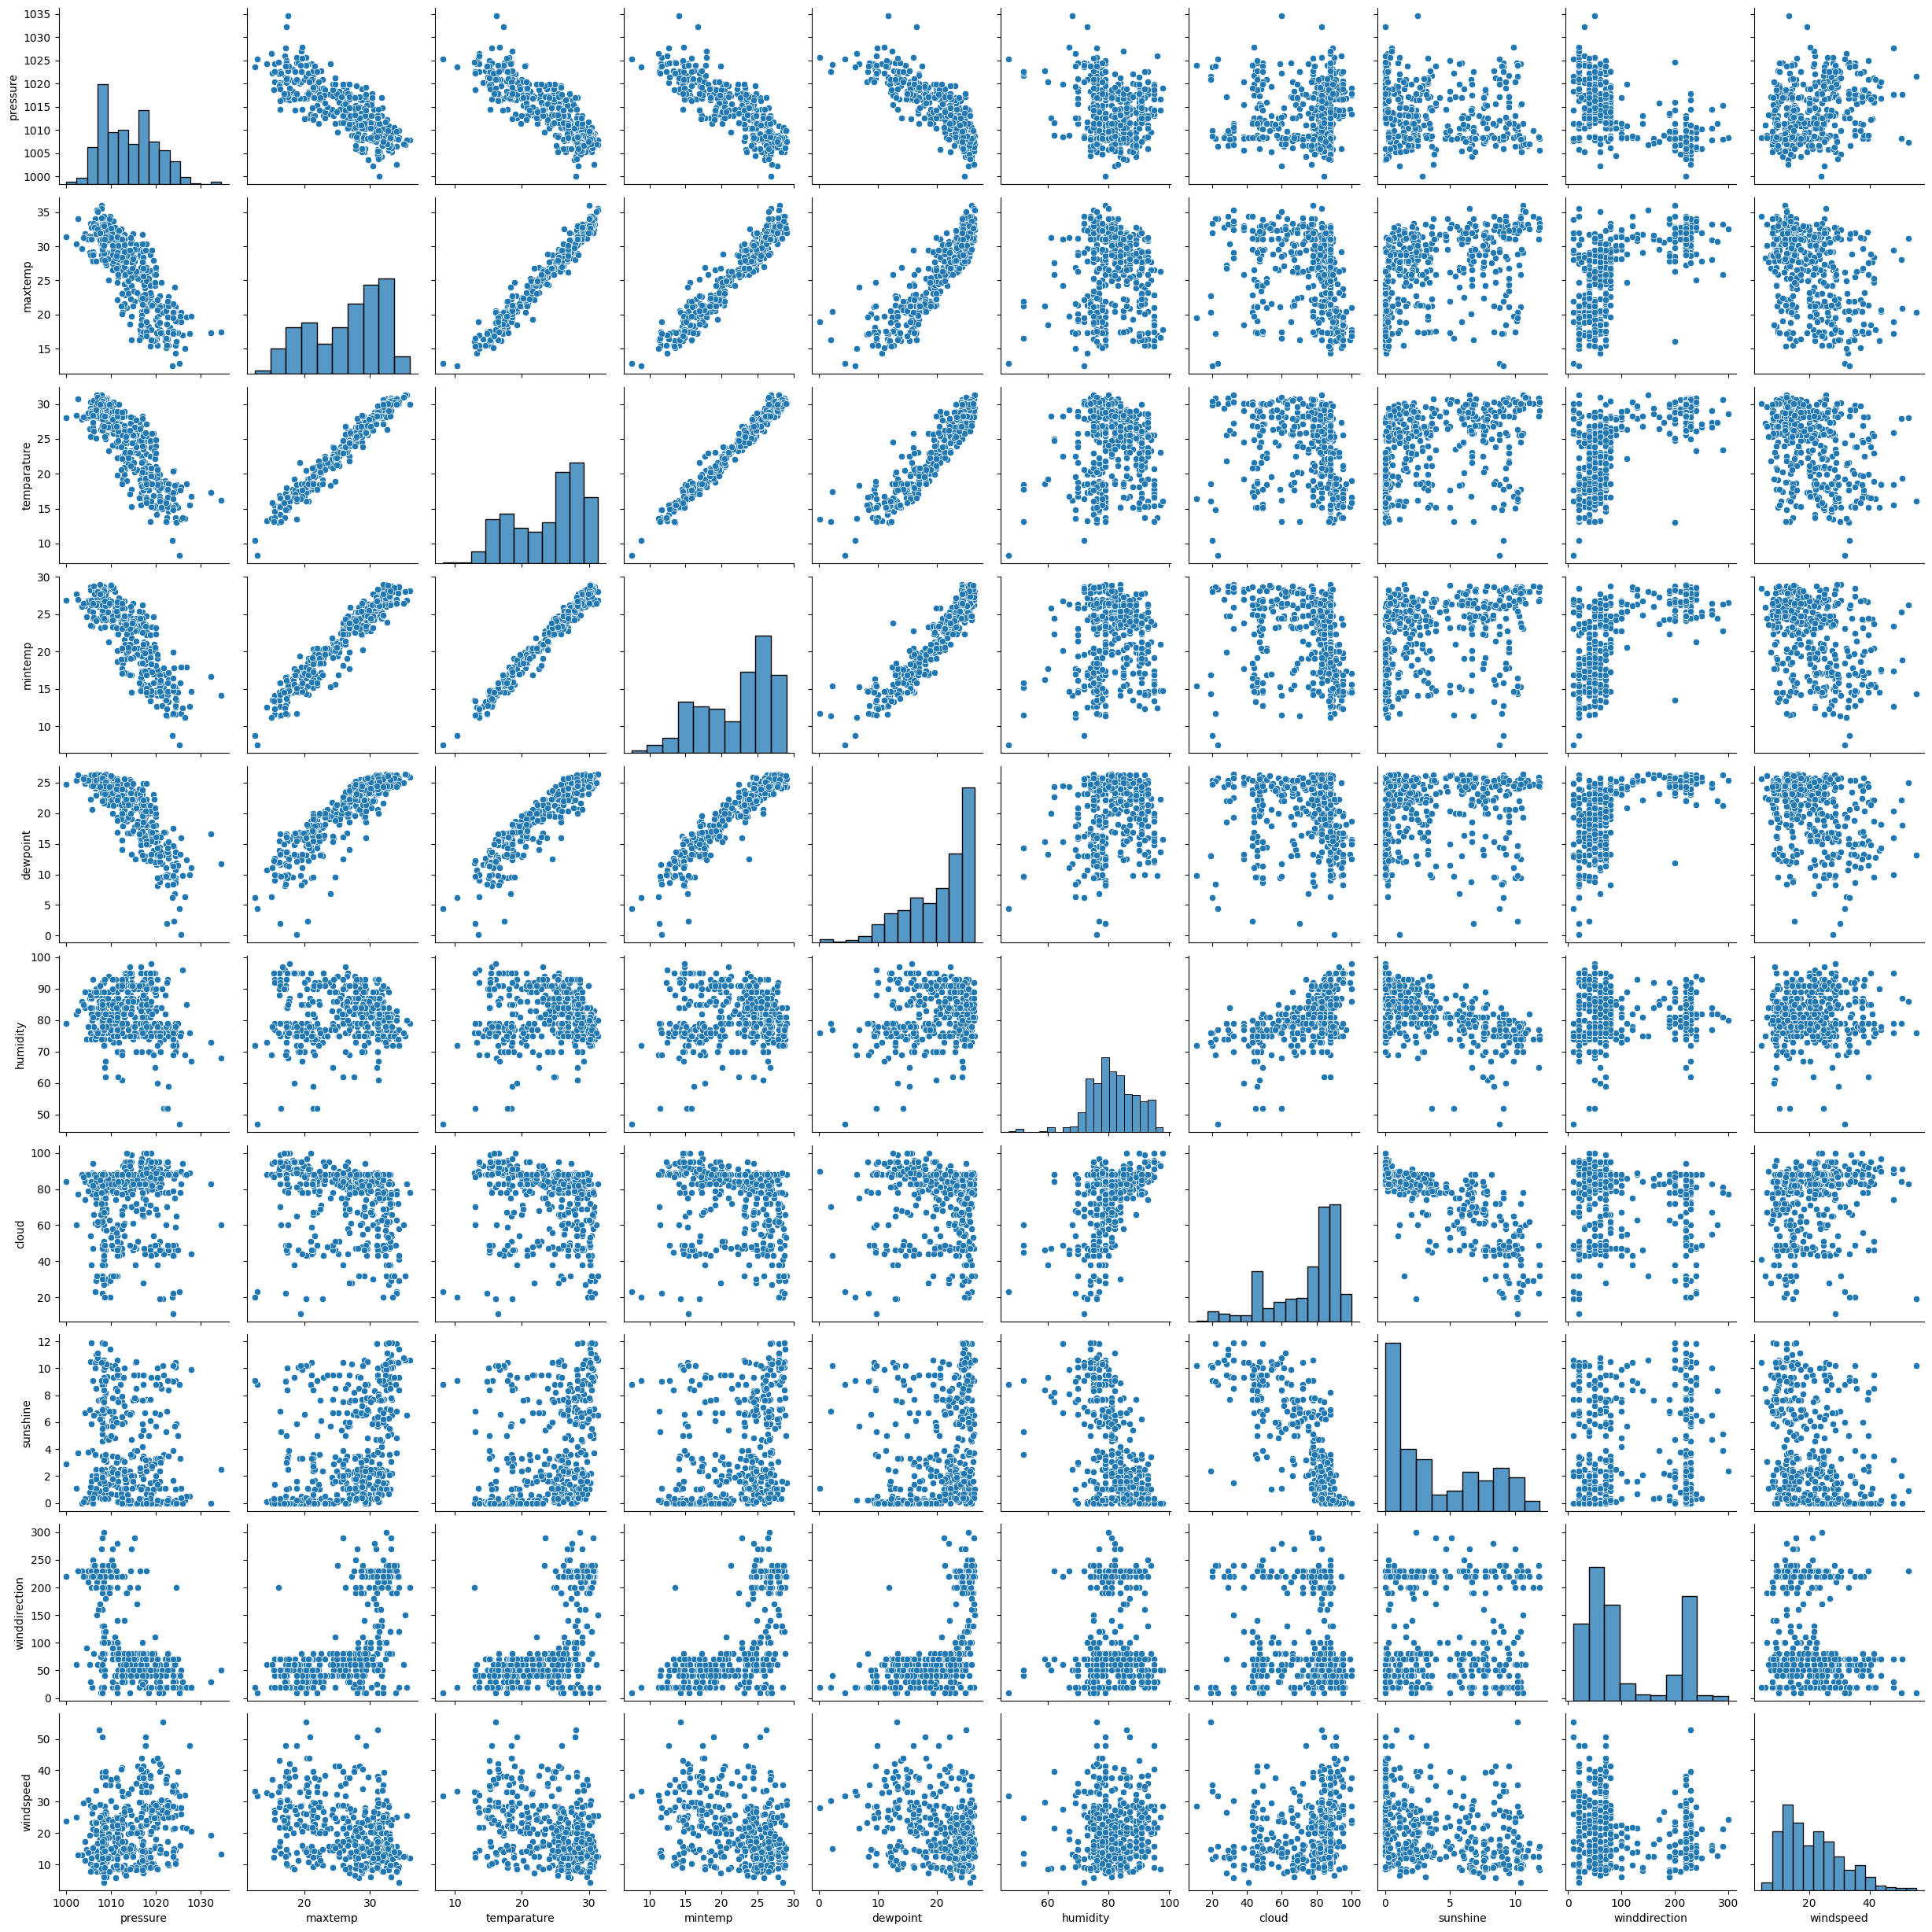

In [30]:
sns.pairplot(train)

<Axes: xlabel='pressure', ylabel='temparature'>

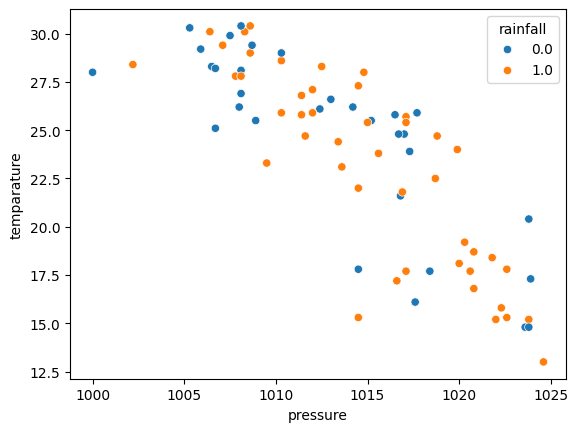

In [26]:
sns.scatterplot(data = train, x = "pressure", y = "temparature", hue = y_train)

<Axes: xlabel='pressure', ylabel='dewpoint'>

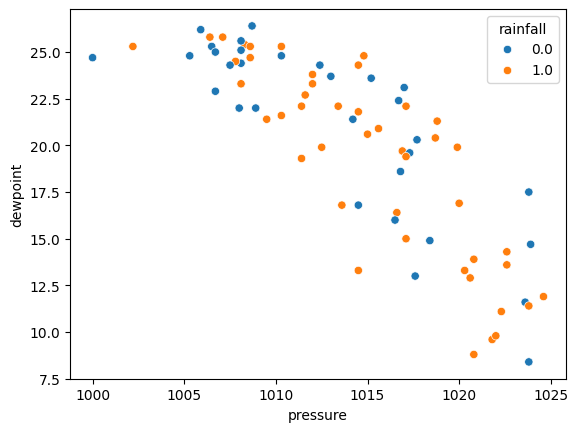

In [27]:
sns.scatterplot(data = train, x = "pressure", y = "dewpoint", hue = y_train)

<Axes: xlabel='temparature', ylabel='dewpoint'>

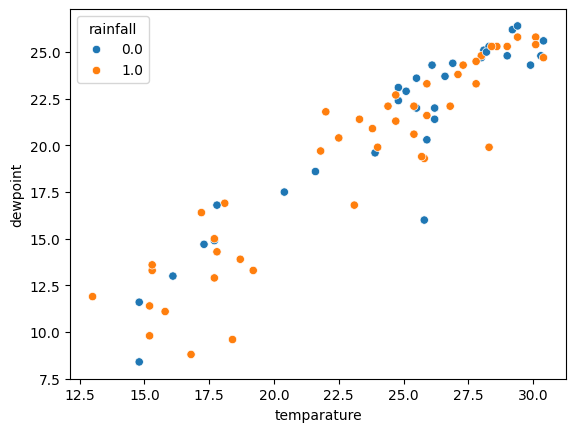

In [28]:
sns.scatterplot(data = train, x = "temparature", y = "dewpoint", hue = y_train)

<Axes: xlabel='maxtemp', ylabel='Count'>

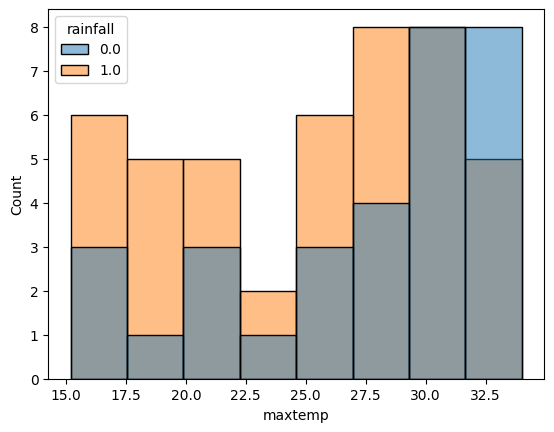

In [34]:
sns.histplot(data = train, x = "maxtemp", hue = y_train)

<Axes: xlabel='mintemp', ylabel='Count'>

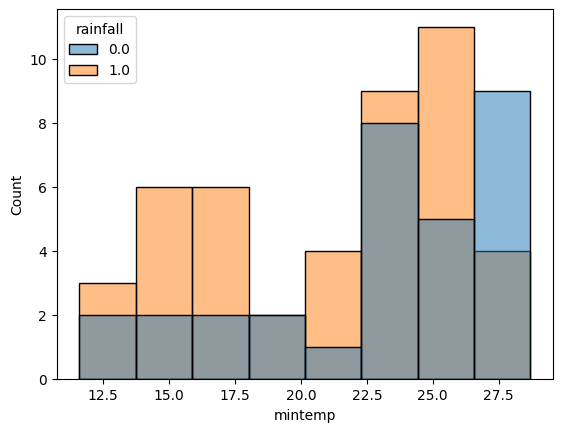

In [35]:
sns.histplot(data = train, x = "mintemp", hue = y_train)

<Axes: xlabel='temparature', ylabel='Count'>

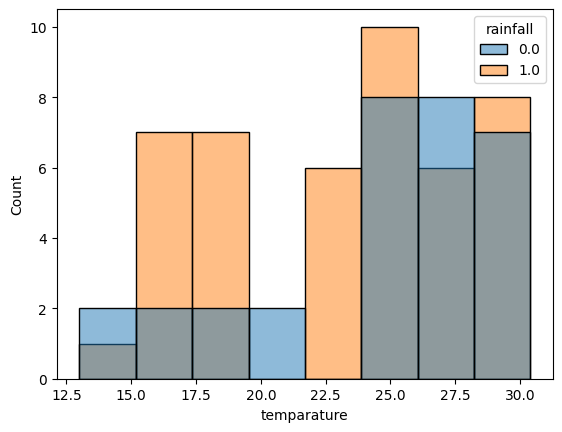

In [36]:
sns.histplot(data = train, x = "temparature", hue = y_train)

<Axes: xlabel='humidity', ylabel='Count'>

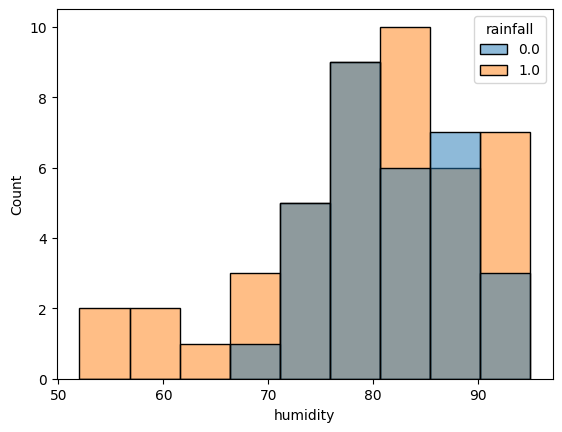

In [37]:
sns.histplot(data = train, x = "humidity", hue = y_train)

In [39]:
from sklearn.compose import ColumnTransformer

In [40]:
from sklearn.preprocessing import StandardScaler

# Model Version 1

In [41]:
cols = train.drop(["maxtemp", "mintemp"], axis=1).columns

In [42]:
cols

Index(['pressure', 'temparature', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
from sklearn.svm import LinearSVC

In [46]:
num_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("SVC_linear", LinearSVC(C = 1, loss = "hinge")),
]
)

In [48]:
num_pipe.fit(train, y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC_linear', LinearSVC(C=1, loss='hinge'))])

In [50]:
v1 = X_test.drop(["id", "day"], axis = 1)

In [51]:
y_pred = num_pipe.predict(v1)

In [55]:
from sklearn.metrics import precision_score, recall_score

In [54]:
precision_score(y_test, y_pred)

0.8926553672316384

In [56]:
recall_score(y_test, y_pred)

0.9461077844311377

# Model Version 2

In [58]:
from sklearn.svm import SVC

In [57]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid = [{"C": [0.1, 1, 10, 100, 1000], "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
     "kernel": ["rbf"]},
     {"C":[1, 10, 100, 1000, 2000], "kernel":["poly"], "degree": [2, 3, 5, 10], "coef0":[1]}, 
     {
         "C":[1, 10, 100, 1000], "kernel" :["linear", "sigmoid"]
     }]


In [83]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(train, y_train)

Fitting 5 folds for each of 53 candidates, totalling 265 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.724 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.724 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.716 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000, 2000], 'coef0': [1],
                          'degree': [2, 3, 5, 10], 'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000],
                          'kernel': ['linear', 'sigmoid']}],
             verbose=3)

In [98]:
from sklearn.impute import SimpleImputer

In [99]:
num_pipe_2 = Pipeline([
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("SVC_modified", grid.best_estimator_),
])

In [100]:
num_pipe_2.fit(train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('SVC_modified', SVC(C=10, kernel='linear'))])

In [101]:
y_pred = num_pipe_2.predict(v1)

In [102]:
precision_score(y_test, y_pred)

0.892983699503898

In [103]:
recall_score(y_test, y_pred)

0.9431137724550899

# Model Version 3

In [73]:
num_pipe_3 = Pipeline([
    ("scaler", StandardScaler()),
    ("SVC_sig", SVC(kernel="sigmoid")),
])

In [74]:
num_pipe_3.fit(train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC_sig', SVC(kernel='sigmoid'))])

In [75]:
y_pred = num_pipe_3.predict(v1)

In [76]:
precision_score(y_test, y_pred)

0.8519072550486163

In [77]:
recall_score(y_test, y_pred)

0.8525449101796407

# Submission File

In [104]:
final_estimator = num_pipe_2

In [90]:
test = pd.read_csv(r"data\test.csv")

In [91]:
test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [92]:
test_modified = test.drop(["id", "day"], axis = 1)

In [97]:
test_modified.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [105]:
y_pred = final_estimator.predict(test_modified)

In [106]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [116]:
submission = pd.DataFrame(test["id"])

In [117]:
submission.head()

,id
0,2190
1,2191
2,2192
3,2193
4,2194


In [118]:
submission["rainfall"] = y_pred

In [119]:
submission

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


In [120]:
submission.to_csv("submission.csv", index= None)